In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree


In [31]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
X=data.data
y=data.target
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Создание и обучение дерева решений для классификации
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)


DecisionTreeRegressor()

In [33]:
# Прогнозирование классов на тестовом наборе
y_pred = clf.predict(X_test)
r2_score(y_test,y_pred)

0.613882502398724

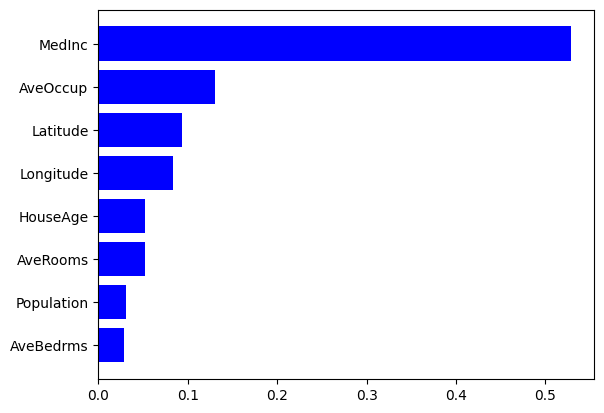

In [34]:
features = X.columns
importances=clf.feature_importances_
indices = np.argsort(importances)
plt.title('')
plt.barh(range(len(indices)), importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.show()

## Решающие дерево для задачи классификации

In [35]:
from sklearn.datasets import load_breast_cancer
# Загрузка данных о раке молочной железы
cancer = load_breast_cancer(as_frame=True)
X = cancer.data
y = cancer.target


In [36]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
y.value_counts()

target
1    357
0    212
Name: count, dtype: int64

Text(0, 0.5, 'tpr')

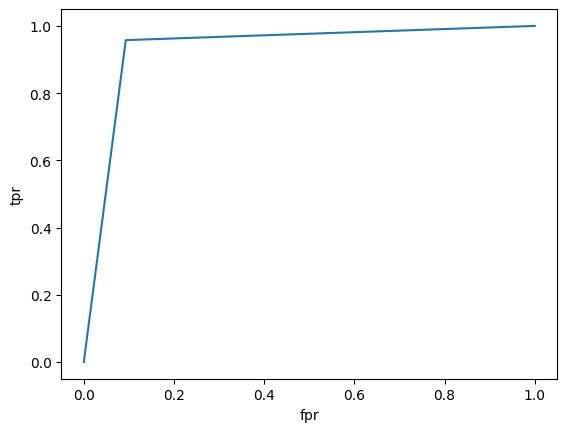

In [38]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Создание и обучение дерева решений для классификации
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
# Прогнозирование классов на тестовом наборе
pred = clf.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
fpr,tpr,_=roc_curve(y_test,pred)

plt.plot(fpr,tpr,'-')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,pred)

np.float64(0.932361611529643)

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression, LinearRegression

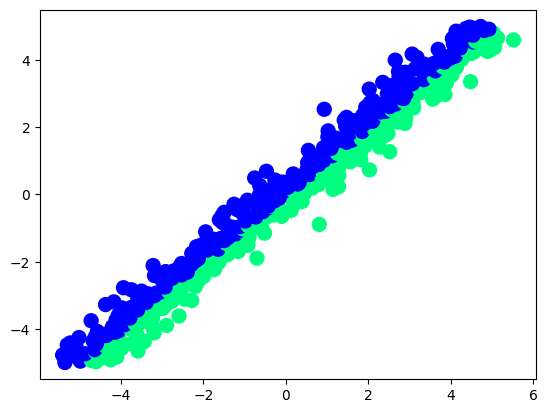

In [41]:
# Генерация синтетических данных
np.random.seed(13)
n=500
X = np.zeros(shape=(n, 2))
X[:,0]=np.linspace(-5,5,500)
X[:,1]=X[:,0]+0.5*np.random.normal(size=n)
y=(X[:,1]>X[:,0]).astype(int)
plt.scatter(X[:,1],X[:,0],s=100,c=y,cmap='winter')
plt.show()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
accuracy_score(pred_lr,y_test)

0.992

In [43]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred_dt=dt.predict(X_test)
accuracy_score(pred_dt,y_test)


0.872

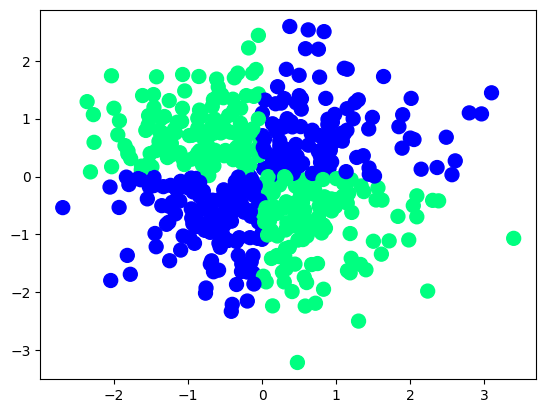

In [44]:
np.random.seed(13)
X = np.random.randn(500,2)
y=np.logical_xor(X[:,1]>0,X[:,0]>0).astype(int)
plt.scatter(X[:,1],X[:,0],s=100,c=y,cmap='winter')
plt.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
accuracy_score(pred_lr,y_test)

0.392

In [46]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred_dt=dt.predict(X_test)
accuracy_score(pred_dt,y_test)

0.968

In [47]:
from sklearn.datasets import load_iris
data= load_iris(as_frame=True)
X=data.data[['sepal length (cm)', 'sepal width (cm)']]
y=data.target
X.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred_test=dt.predict(X_test)
pred_train=dt.predict(X_train)
print(dt.get_depth())
print(accuracy_score(y_test,pred_test),accuracy_score(y_train,pred_train))


10
0.6666666666666666 0.95


In [49]:
path=dt.cost_complexity_pruning_path(X_train,y_train)
alphas=path['ccp_alphas']
alphas

array([0.        , 0.00277778, 0.00277778, 0.00277778, 0.00324074,
       0.00518519, 0.00555556, 0.00694444, 0.00743464, 0.01006944,
       0.01041667, 0.01161038, 0.01230159, 0.01581699, 0.02010944,
       0.05683866, 0.06089286, 0.20756944])

Чем больше альфа, тем сильнее регуляризация и тем меньше дерево переобучается
Посмотрим на зависимость качества предсказания на тренировочных и тестовых данных в зависимости от альфа

In [55]:
ac_tr,ac_test=[],[]
for i in alphas:
    dt= DecisionTreeClassifier(ccp_alpha=i)
    dt.fit(X_train,y_train)
    pred_test=dt.predict(X_test)
    pred_train=dt.predict(X_train)
    ac_test.append(accuracy_score(y_test,pred_test))
    ac_tr.append(accuracy_score(y_train,pred_train))



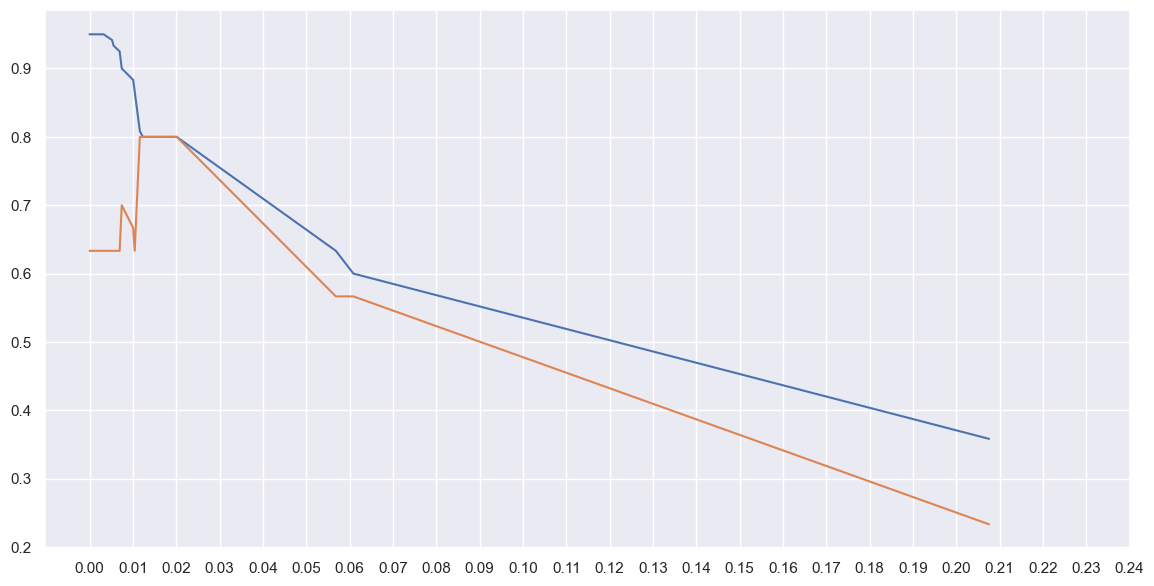

In [56]:
import seaborn as sns
sns.set()   
plt.figure(figsize=(14,7))
sns.lineplot(y=ac_tr,x=alphas)
sns.lineplot(y=ac_test,x=alphas)
plt.xticks(ticks=np.arange(0,0.25,0.01))
plt.show()

На графике видим что тренировочные и тестовые данные совпадают при альфе 0.02
Ставим это значение в модель обучения

In [57]:
dt=DecisionTreeClassifier(ccp_alpha=0.02,random_state=40)
dt.fit(X_train,y_train)
pred_test=dt.predict(X_test)
pred_train=dt.predict(X_train)
print(dt.get_depth())
print(accuracy_score(y_test,pred_test),accuracy_score(y_train,pred_train))

3
0.8 0.8


Глубина дерева уменьшилась с 10 до трех, качество предсказаний модели та тестовой и обучающей выборке одинаково - модель не переобучается под конкретные данные